## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [2]:
import numpy as np
import pandas as pd

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [3]:
diabetes = pd.read_csv('./diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [6]:
X = diabetes.drop(columns = 'Outcome')
y = diabetes['Outcome']

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=y)


1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

A: 표본이 768개로 적기 때문에 test_size의 비율을 0.2, 0.3 정도로 설정하는 것이 좋다.

1.7 stratify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

A: stratify에 타겟 변수를 입력하지 않으면 타겟 변수의 범주별 비율이 데이터 셋마다 달라지므로 평가 결과를 신뢰하기 어렵다. 주로 클래스 분포 비율을 맞춰줄 때 사용한다.

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [37]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

clf = tree.DecisionTreeClassifier(random_state = 1234)
model = clf.fit(X = X_train, y = y_train)
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:, 1]

def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)

    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[107  43]
 [ 34  47]]
정확도: 0.6667, 정밀도: 0.5222, 재현율: 0.580247, F1: 0.5497, AUC:0.6468


2.2 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

A: 모델이 예측한 값 중 맞은 경우와 틀린 경우의 빈도를 나타내는 행렬이다.

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [51]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver = 'liblinear')
lr_model = lr_clf.fit(X = X_train, y = y_train)
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:, 1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8433


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

A: solver 파라미터는 비용함수의 최솟값을 어떠한 방법으로 찾을 건지 지정하는 역할을 한다.

1. newton-cg: 여러 번의 업데이트를 통해 비용함수를 최소화하는 파라미터의 값을 찾는 방법 / l1, none 규제화
2. lbfgs: newton-cg와는 다르게 2차 도함수의 근사치를 사용하여 속도를 개선한 방법 / l1, none 규제화
3. liblinear: 경사하강법과는 다르게 한 번에 하나의 파라미터만 업데이트하는 방법 / l1, l2 규제화
4. sag: 경사하강법과는 다르게 이전 업데이트 단계에서의 경사값을 현재 업데이트에 사용하는 방법 / l2, none 규제화
5. saga: l1, l2, elasticnet, none까지 모두 사용가능하게 만드는 방법 

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

A: pred는 타겟 변수에 대한 예측 값을, pred_proba는 타겟 변수의 값에 대한 예측 확률을 나타낸다

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #X축, y축 label과 legend, grid 설정
    plt.xlabel('Threshole value / Precision and Recall value')
    plt.legend()
    plt.grid()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

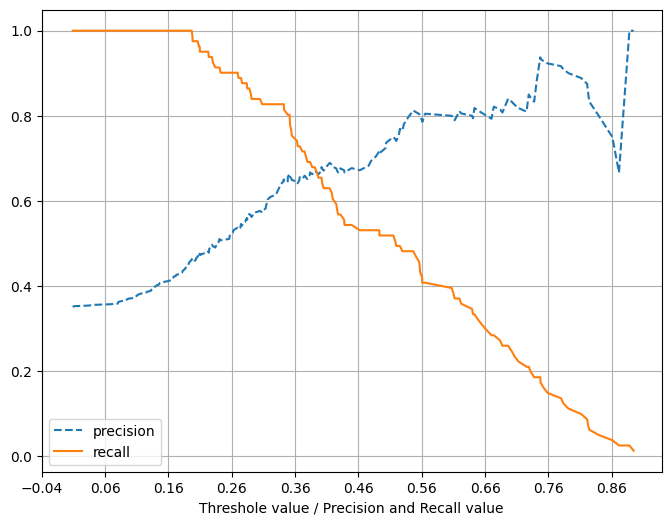

In [54]:
precision_recall_curve_plot(y_test, pred_proba_c1)
plt.show()

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [57]:
diabetes.describe(include = 'all')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [65]:
diabetes['Glucose'] = diabetes['Glucose'].replace(0, diabetes['Glucose'].mean())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, diabetes['BloodPressure'].mean())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0, diabetes['SkinThickness'].mean())
diabetes['Insulin'] = diabetes['Insulin'].replace(0, diabetes['Insulin'].mean())
diabetes['BMI'] = diabetes['BMI'].replace(0, diabetes['BMI'].mean())

diabetes.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,False
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958,69.105469
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951,0.000000
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,69.105469
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000,69.105469
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,69.105469
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,69.105469
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,69.105469


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [70]:
from sklearn.preprocessing import StandardScaler
standare_scaler = StandardScaler()
X_scaled = standare_scaler.fit_transform(X)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

A: feature scaling은 서로 다른 feature 값의 범위를 일치시키는 작업이다.

1. min-max 정규화: feature 값의 범위를 0~1로 조정하는 기법
2. 표준화: 평균이 0, 분산이 1이 되도록 feature 값을 조정하는 기법

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [71]:
from sklearn.model_selection import train_test_split

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [73]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = 'liblinear', max_iter = 2000) #경고 방지를 위해 모델의 수렴을 증가시킴
clf.fit(X_scaled_train, y_train.astype(int))
y_clf = clf.predict(X_scaled_test)
y_proba = clf.predict_proba(X_scaled_test)[:, 1]

confusion = confusion_matrix(y_test, y_clf)

accuracy = accuracy_score(y_test, y_clf)
precision = precision_score(y_test, y_clf)
recall = recall_score(y_test, y_clf)
f1 = f1_score(y_test, y_clf)
roc_auc = roc_auc_score(y_test, y_proba)

print('오차 행렬,\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차 행렬,
 [[132  18]
 [ 38  43]]
정확도: 0.7576, 정밀도: 0.7049, 재현율: 0.530864, F1: 0.6056, AUC:0.8584


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [86]:
#MAE

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

regr = DecisionTreeRegressor(random_state = 1234)
regr.fit(X_scaled_train, y_train)

mean_absolute_error(y_test, regr.predict(X_scaled_test))

#MAE 값이 0.3333..으로 작게 나왔으므로 모델이 예측을 정확하게 수행했음을 확인

0.3333333333333333

In [85]:
#SVR

from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=y)

regr1 = SVR(kernel = 'linear')
regr1.fit(X_scaled_train, y_train)

regr2 = SGDRegressor(random_state =1234)
regr2.fit(X_scaled_train, y_train)

print('SVR: ', mean_absolute_error(y_test, regr1.predict(X_scaled_test)))
print('Lin. Regrssion: ', mean_absolute_error(y_test, regr2.predict(X_scaled_test)))

#SVR의 평균 절대 오차가 더 작으므로 SVR이 선형 회귀보다 더 나은 성능을 보인다고 해석


SVR:  0.3238272267534556
Lin. Regrssion:  0.33890573962821163
